In [129]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import graphviz
import time
df=pd.read_csv("adult.csv",names=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]) 

# 資料前處理

In [130]:
#刪除重複和問號的值
print("原始比數：",df.shape)
df.drop_duplicates(inplace=True)
print("刪除重複的值後：",df.shape)
df = df.replace(" ?", np.nan)
print("空的值有幾筆",df[pd.isnull(df).any(axis=1)].shape)
df.dropna(inplace=True)
print("刪除空值：",df.shape)

原始比數： (32561, 15)
刪除重複的值後： (32537, 15)
空的值有幾筆 (2398, 15)
刪除空值： (30139, 15)


In [131]:
df_y=df['hours-per-week']
df_X=df.drop(['hours-per-week'],axis=1)

normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','education-num']
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
#y_columns=['hours-per-week']
#將類別資料轉成 labelencode
le = LabelEncoder()
for col in categorical_columns:
    df_X[col] = le.fit_transform(df_X[col])

def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df_X[columns] = scaler.fit_transform(df_X[columns])

normalize(normalize_columns)


print(df_X)

            age  workclass    fnlwgt  education  education-num  \
0      0.042516          5 -1.062676          9       1.128996   
1      0.880215          4 -1.007829          9       1.128996   
2     -0.033639          2  0.244669         11      -0.440434   
3      1.108678          2  0.425206          1      -1.225149   
4     -0.795183          2  1.406572          9       1.128996   
...         ...        ...       ...        ...            ...   
32556 -0.871338          2  0.638926          7       0.736639   
32557  0.118670          2 -0.335246         11      -0.440434   
32558  1.489450          2 -0.358567         11      -0.440434   
32559 -1.252110          2  0.110688         11      -0.440434   
32560  1.032523          3  0.928780         11      -0.440434   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           0             1     4    1      0.145925   
1                   2           3             0     4  

In [132]:
df['salary']
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
onehot = onehotencoder.fit_transform(df[['salary']]).toarray()
pd.DataFrame(onehot)

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
30134,1.0,0.0
30135,0.0,1.0
30136,1.0,0.0
30137,1.0,0.0


# Model

In [133]:
# Tensorflow / Keras

# print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.
from tensorflow.keras import layers
import tensorflow as tf
from keras import losses
#模型架構
model = Sequential(name="Model-with-One-Input") # Model
model.add(Input(shape=(14,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer1')) 
model.add(Dense(128, activation='relu', name='Hidden-Layer2'))
model.add(Dense(128, activation='relu', name='Hidden-Layer3'))
model.add(Dense(128, activation='relu', name='Hidden-Layer4'))
model.add(Dense(128, activation='relu', name='Hidden-Layer5')) 
model.add(Dense(1, name='Output-Layer'))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error','mean_absolute_percentage_error'])

#模型訓練
#設定early stopping
patience=10
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=patience, monitor = 'val_loss'),
    tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
]


In [134]:
model_train =model.fit(df_X, df_y, epochs=10000, batch_size=64, validation_split=0.05,callbacks=[my_callbacks])    
print(f"訓練最好的Epoch{len(model_train.history['val_loss'])-patience}")

Epoch 1/10000
448/448 [==============================] - 2s 4ms/step - loss: 168.9961 - mean_absolute_error: 8.8498 - mean_absolute_percentage_error: 32.4675 - val_loss: 132.2883 - val_mean_absolute_error: 8.1034 - val_mean_absolute_percentage_error: 30.5089 - lr: 0.0010
Epoch 2/10000
448/448 [==============================] - 1s 3ms/step - loss: 128.1839 - mean_absolute_error: 7.8546 - mean_absolute_percentage_error: 29.6361 - val_loss: 136.4215 - val_mean_absolute_error: 8.4747 - val_mean_absolute_percentage_error: 32.6555 - lr: 0.0011
Epoch 3/10000
448/448 [==============================] - 1s 3ms/step - loss: 125.1725 - mean_absolute_error: 7.8005 - mean_absolute_percentage_error: 29.0477 - val_loss: 128.6915 - val_mean_absolute_error: 7.9498 - val_mean_absolute_percentage_error: 27.8880 - lr: 0.0012
Epoch 4/10000
448/448 [==============================] - 1s 3ms/step - loss: 119.9072 - mean_absolute_error: 7.6486 - mean_absolute_percentage_error: 28.0906 - val_loss: 123.1459 - val

# 模型架構

In [135]:
model.summary()

Model: "Model-with-One-Input"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 128)               1920      
                                                                 
 Hidden-Layer2 (Dense)       (None, 128)               16512     
                                                                 
 Hidden-Layer3 (Dense)       (None, 128)               16512     
                                                                 
 Hidden-Layer4 (Dense)       (None, 128)               16512     
                                                                 
 Hidden-Layer5 (Dense)       (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 68,097
Trainable params: 68,097


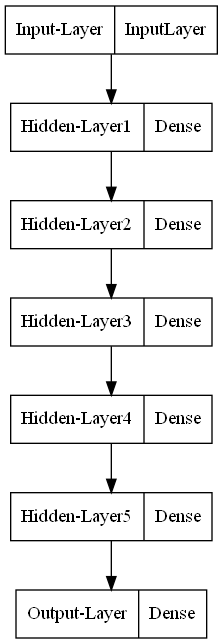

In [136]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=False)

# 圖表

In [137]:
import matplotlib.pyplot as plt
from math import sqrt
def picture(loss,val_loss):
    if(loss=='root_mean_squared_error'):
        mse_loss='loss'
        val_mse_loss='val_loss'
        temp=[]
        for i in range(len(model_train.history[mse_loss])):
            temp.append(sqrt(model_train.history[mse_loss][i]))
        model_train.history[loss]=temp
        temp=[]
        for i in range(len(model_train.history[val_mse_loss])):
            temp.append(sqrt(model_train.history[val_mse_loss][i]))
        model_train.history[val_loss]=temp        
    # 對訓練過程的mse繪圖
    train_mse=model_train.history[loss]
    dev_mse=model_train.history[val_loss]
    plt.figure(figsize =(8,5))
    plt.plot(range(1,len(model_train.history[loss])+1),train_mse,label='training '+ loss)
    plt.plot(range(1,len(model_train.history[val_loss])+1),dev_mse,label=val_loss)
    # plt.xticks(range(1,len(model_train.history[val_loss])+1))
    plt.ylabel(f"{loss}")
    plt.xlabel("epoch")
    plt.title("training predict hours-per-week ")
    plt.grid(True)#有網格
    plt.legend()#可以印出label
    plt.show()

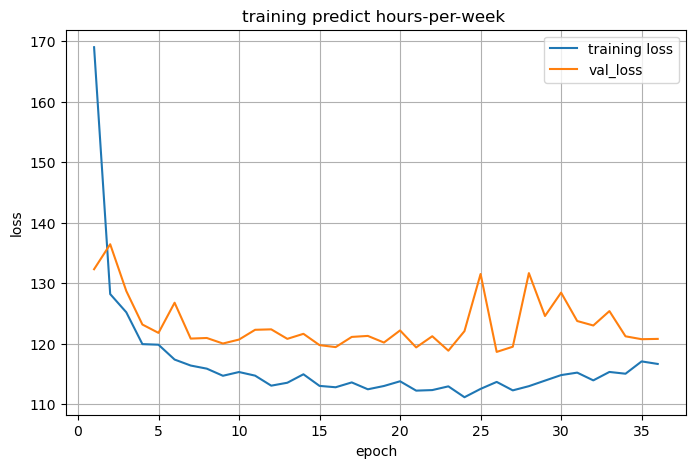

In [138]:
picture('loss','val_loss')

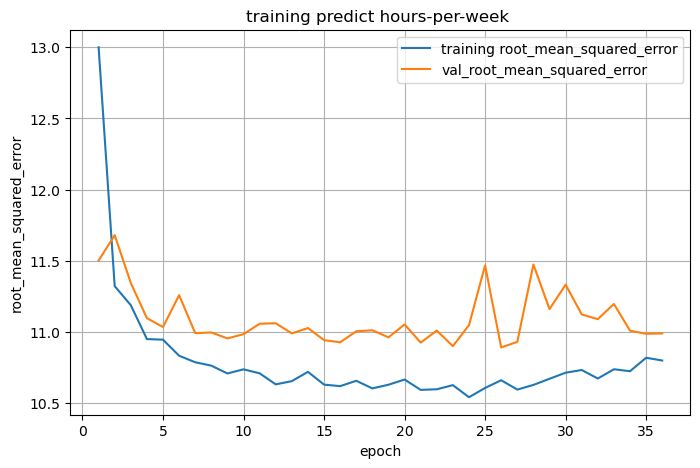

In [139]:
picture('root_mean_squared_error','val_root_mean_squared_error')

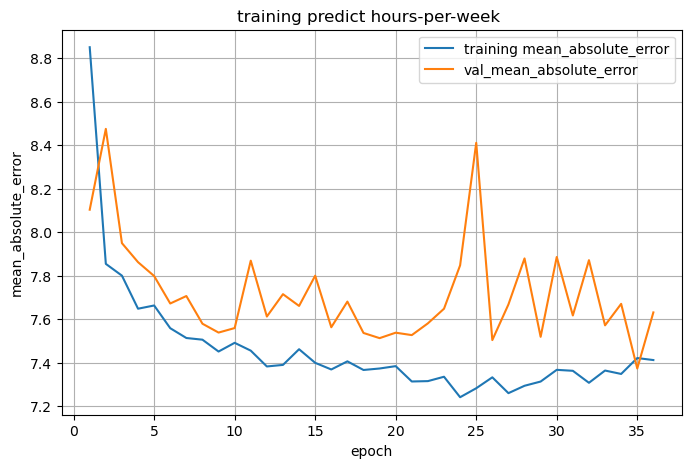

In [140]:
picture('mean_absolute_error','val_mean_absolute_error')

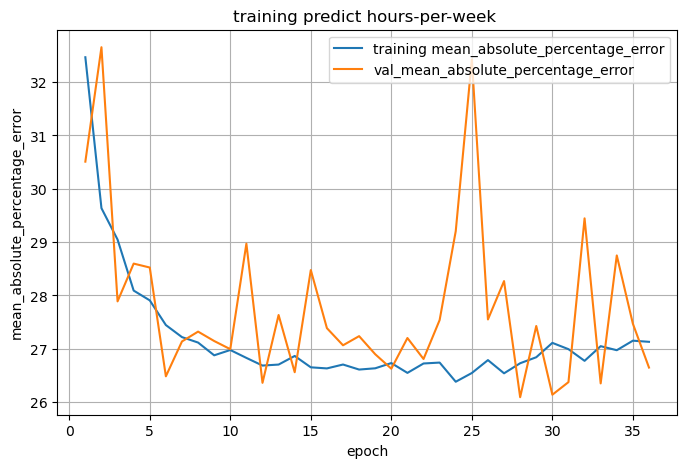

In [141]:
picture('mean_absolute_percentage_error','val_mean_absolute_percentage_error')

# 測試資料

In [142]:
df_test=pd.read_csv("adult_test.csv",names=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]) 

## 一樣須作前處理

In [143]:
#刪除重複和問號的值
print("原始比數：",df_test.shape)
df_test.drop_duplicates(inplace=True)
print("刪除重複的值後：",df_test.shape)
df_test = df_test.replace(" ?", np.nan)
print("空的值有幾筆",df_test[pd.isnull(df_test).any(axis=1)].shape)
df_test.dropna(inplace=True)
print("刪除空值：",df_test.shape)

原始比數： (16282, 15)
刪除重複的值後： (16277, 15)
空的值有幾筆 (1222, 15)
刪除空值： (15055, 15)


In [144]:
df_y=df_test['hours-per-week']
df_X=df_test.drop(['hours-per-week'],axis=1)

normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','education-num']
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
#y_columns=['hours-per-week']
#將類別資料轉成 labelencode
le = LabelEncoder()
for col in categorical_columns:
    df_X[col] = le.fit_transform(df_X[col])

def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df_X[columns] = scaler.fit_transform(df_X[columns])

normalize(normalize_columns)


print(df_X)

            age  workclass    fnlwgt  education  education-num  \
1     -1.029269          2  0.352055          1      -1.216355   
2     -0.057699          2 -0.945124         11      -0.434700   
3     -0.805061          1  1.395087          7       0.737782   
4      0.390718          2 -0.277454         15      -0.043872   
6     -0.356644          2  0.085883          0      -1.607182   
...         ...        ...       ...        ...            ...   
16276 -0.431380          2  0.526375          9       1.128610   
16277  0.017037          2  0.244266          9       1.128610   
16279 -0.057699          2  1.755223          9       1.128610   
16280  0.390718          2 -1.001210          9       1.128610   
16281 -0.281907          3 -0.070787          9       1.128610   

       marital-status  occupation  relationship  race  sex  capital-gain  \
1                   4           6             3     2    1     -0.145463   
2                   2           4             0     4  

## 評估

In [145]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
pred=model.predict(df_X)
#將索引按照1,2,3,4順序排列，避免有跳號出現
df_y.index=[np.arange(1,len(df_y)+1)]
print("列出前10筆資料")
table={'pred hours-per-week value':pred[:10].squeeze(), 'true hours-per-week value':df_y[:10]}
print(pd.DataFrame(table),'\n')

error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value is:', error_RMSE)
print('MAE value is:', error_MAE)
print('MAPE value is:', error_MAPE)

471/471 [==============================] - 1s 2ms/step
列出前10筆資料
    pred hours-per-week value  true hours-per-week value
1                   31.480244                       40.0
2                   48.368126                       50.0
3                   45.699219                       40.0
4                   44.871861                       40.0
5                   39.947220                       30.0
6                   42.118286                       32.0
7                   29.225895                       40.0
8                   40.987854                       10.0
9                   41.214500                       40.0
10                  42.294090                       40.0 

RMSE value is: 10.724787912232573
MAE value is: 7.4448438266233445
MAPE value is: 0.26752698444094813


# 整合各個模型參數圖表圖表

In [146]:
# evl=pd.DataFrame({
#                 "loss":model_train.history['loss'],
#                 "root_mean_squared_error":model_train.history['root_mean_squared_error'],
#                 "mean_absolute_error":model_train.history['mean_absolute_error'],
#                 "mean_absolute_percentage_error":model_train.history['mean_absolute_percentage_error'],
#                 "val_loss":model_train.history['val_loss'],
#                 "val_root_mean_squared_error":model_train.history['val_root_mean_squared_error'],
#                 "val_mean_absolute_error":model_train.history['val_mean_absolute_error'],
#                 "val_mean_absolute_percentage_error":model_train.history['val_mean_absolute_percentage_error']
#                 })

In [147]:
# evl.to_csv('set_4.csv', sep='\t',index=False, header=None)

# learning rate vs loss

In [1]:
learning_rates = 1e-3 * (10 ** (np.arange(36) / 30))
plt.semilogx(
    learning_rates, 
    model_train.history['val_loss'], 
    
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)
plt.show()

NameError: name 'np' is not defined